In [146]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

%matplotlib inline

path = './Documents/Kaggle/Titanic/data/'
train = pd.read_csv(path + 'train.csv')
test = pd.read_csv(path + 'test.csv')

data = pd.concat([train,test], axis=0)
data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1309 entries, 0 to 417
Data columns (total 12 columns):
Age            1046 non-null float64
Cabin          295 non-null object
Embarked       1307 non-null object
Fare           1308 non-null float64
Name           1309 non-null object
Parch          1309 non-null int64
PassengerId    1309 non-null int64
Pclass         1309 non-null int64
Sex            1309 non-null object
SibSp          1309 non-null int64
Survived       891 non-null float64
Ticket         1309 non-null object
dtypes: float64(3), int64(4), object(5)
memory usage: 132.9+ KB


## Creating columns Surname and Title

In [147]:
data['Surname'] = data.Name.str.extract('(.*),', expand=False)
data['Title'] = data.Name.str.extract(' ([A-Z][a-z]+)\.', expand=False).replace(
    {'Dona': 'Rare Title', 'Lady': 'Rare Title', 'Countess': 'Rare Title', 'Capt': 'Rare Title',
     'Col': 'Rare Title', 'Don': 'Rare Title',
     'Dr': 'Rare Title', 'Major': 'Rare Title', 'Rev': 'Rare Title', 'Sir': 'Rare Title', 'Jonkheer': 'Rare Title',
     'Mlle': 'Miss','Ms':'Miss','Mme':'Mrs'})


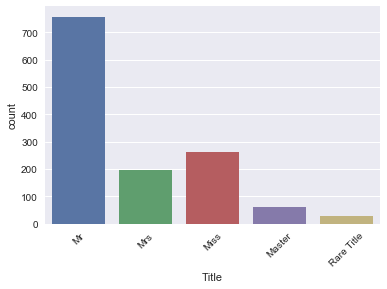

In [148]:
sns.countplot(x='Title', data=data);
plt.xticks(rotation=45);

In [149]:
data.Surname.head(4)

0       Braund
1      Cumings
2    Heikkinen
3     Futrelle
Name: Surname, dtype: object

## Do families sink or swim together?

In [150]:
data['FamilySize'] = data.Parch + data.SibSp + 1

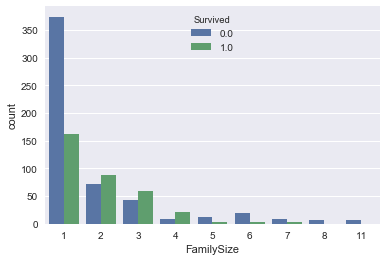

In [151]:
sns.countplot(x='FamilySize', hue='Survived', data=data)

<class 'pandas.core.frame.DataFrame'>
Int64Index: 891 entries, 0 to 890
Data columns (total 16 columns):
Age            714 non-null float64
Cabin          204 non-null object
Embarked       889 non-null object
Fare           891 non-null float64
Name           891 non-null object
Parch          891 non-null int64
PassengerId    891 non-null int64
Pclass         891 non-null int64
Sex            891 non-null object
SibSp          891 non-null int64
Survived       891 non-null float64
Ticket         891 non-null object
Surname        891 non-null object
Title          891 non-null object
FamilySize     891 non-null int64
FSize          876 non-null object
dtypes: float64(3), int64(5), object(8)
memory usage: 118.3+ KB
None


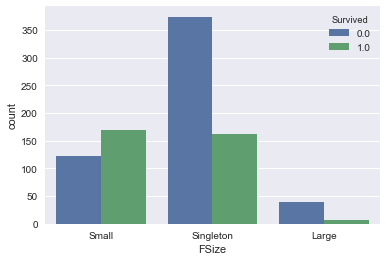

In [152]:
# Discretize family size

def getFSize(val):
    if val ==1:
        return 'Singleton'
    elif val > 1 and val < 5:
        return 'Small'
    elif val > 5:
        return 'Large'
data['FSize'] = data.FamilySize.apply(lambda x: getFSize(x))
print(data[~data['Survived'].isnull()].info())
sns.countplot(x='FSize',hue='Survived', data=data[~data['Survived'].isnull()])

## Passenger Cabin

In [153]:
data['Deck'] = data.Cabin.str.extract('^([A-Z])', expand=False)

In [154]:
data.head(5)

,Age,Cabin,Embarked,Fare,Name,Parch,PassengerId,Pclass,Sex,SibSp,Survived,Ticket,Surname,Title,FamilySize,FSize,Deck
0,22.0,NaN,S,7.2500,"Braund, Mr. Owen Harris",0,1,3,male,1,0.0,A/5 21171,Braund,Mr,2,Small,NaN
1,38.0,C85,C,71.2833,"Cumings, Mrs. John Bradley (Florence Briggs Th...",0,2,1,female,1,1.0,PC 17599,Cumings,Mrs,2,Small,C
2,26.0,NaN,S,7.9250,"Heikkinen, Miss. Laina",0,3,3,female,0,1.0,STON/O2. 3101282,Heikkinen,Miss,1,Singleton,NaN
3,35.0,C123,S,53.1000,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",0,4,1,female,1,1.0,113803,Futrelle,Mrs,2,Small,C
4,35.0,NaN,S,8.0500,"Allen, Mr. William Henry",0,5,3,male,0,0.0,373450,Allen,Mr,1,Singleton,NaN


## Missing Data

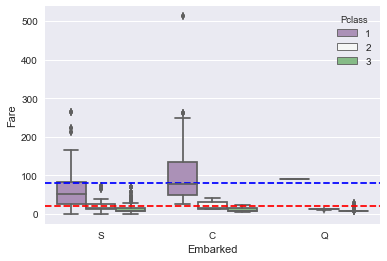

In [155]:
# Embarked
sns.boxplot(x='Embarked',y='Fare', hue='Pclass', data=data,palette="PRGn" );
plt.axhline(y=20, xmin=0,color = 'r',ls='--')
plt.axhline(y=80, xmin=0,color = 'b',ls='--')

In [156]:
data[data['Embarked'].isnull()]

,Age,Cabin,Embarked,Fare,Name,Parch,PassengerId,Pclass,Sex,SibSp,Survived,Ticket,Surname,Title,FamilySize,FSize,Deck
61,38.0,B28,NaN,80.0,"Icard, Miss. Amelie",0,62,1,female,0,1.0,113572,Icard,Miss,1,Singleton,B
829,62.0,B28,NaN,80.0,"Stone, Mrs. George Nelson (Martha Evelyn)",0,830,1,female,0,1.0,113572,Stone,Mrs,1,Singleton,B


Voilà! The median fare for a first class passenger departing from Charbourg (‘C’) coincides nicely with the $80 paid by our embarkment-deficient passengers. I think we can safely replace the NA values with ‘C’.

In [157]:
data['Embarked'].fillna('C',inplace=True);
data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1309 entries, 0 to 417
Data columns (total 17 columns):
Age            1046 non-null float64
Cabin          295 non-null object
Embarked       1309 non-null object
Fare           1308 non-null float64
Name           1309 non-null object
Parch          1309 non-null int64
PassengerId    1309 non-null int64
Pclass         1309 non-null int64
Sex            1309 non-null object
SibSp          1309 non-null int64
Survived       891 non-null float64
Ticket         1309 non-null object
Surname        1309 non-null object
Title          1309 non-null object
FamilySize     1309 non-null int64
FSize          1287 non-null object
Deck           295 non-null object
dtypes: float64(3), int64(5), object(9)
memory usage: 224.1+ KB


In [158]:
data[data['Fare'].isnull()]

,Age,Cabin,Embarked,Fare,Name,Parch,PassengerId,Pclass,Sex,SibSp,Survived,Ticket,Surname,Title,FamilySize,FSize,Deck
152,60.5,NaN,S,NaN,"Storey, Mr. Thomas",0,1044,3,male,0,NaN,3701,Storey,Mr,1,Singleton,NaN


8.05


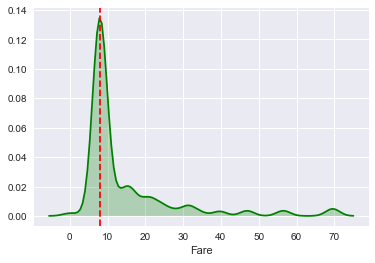

In [159]:
sns.distplot(a=data[(~data['Fare'].isnull()) & (data['Pclass']==3) & (data['Embarked']=='S')].Fare,hist=False, color="g",kde_kws={"shade": True});
plt.axvline(x=data[(~data['Fare'].isnull()) & (data['Pclass']==3) & (data['Embarked']=='S')].Fare.median(), color = 'r', ls='--');
print(data[(~data['Fare'].isnull()) & (data['Pclass']==3) & (data['Embarked']=='S')].Fare.median())
data.Fare.fillna(8.05, inplace=True)

## Predictive imputation

In [160]:
data.head()

,Age,Cabin,Embarked,Fare,Name,Parch,PassengerId,Pclass,Sex,SibSp,Survived,Ticket,Surname,Title,FamilySize,FSize,Deck
0,22.0,NaN,S,7.2500,"Braund, Mr. Owen Harris",0,1,3,male,1,0.0,A/5 21171,Braund,Mr,2,Small,NaN
1,38.0,C85,C,71.2833,"Cumings, Mrs. John Bradley (Florence Briggs Th...",0,2,1,female,1,1.0,PC 17599,Cumings,Mrs,2,Small,C
2,26.0,NaN,S,7.9250,"Heikkinen, Miss. Laina",0,3,3,female,0,1.0,STON/O2. 3101282,Heikkinen,Miss,1,Singleton,NaN
3,35.0,C123,S,53.1000,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",0,4,1,female,1,1.0,113803,Futrelle,Mrs,2,Small,C
4,35.0,NaN,S,8.0500,"Allen, Mr. William Henry",0,5,3,male,0,0.0,373450,Allen,Mr,1,Singleton,NaN


Finally, as we noted earlier, there are quite a few missing Age values in our data. We are going to get a bit more fancy in imputing missing age values. Why? Because we can. We will create a model predicting ages based on other variables.

In [161]:
from fancyimpute import KNN
import numpy as np

data_numeric = data[['PassengerId','Age']]
# # df_filled.columns = data_numeric.columns
# # df_filled.index = data_numeric.index
df_filled = KNN(k=3).complete(data_numeric)


Imputing row 1/1309 with 0 missing, elapsed time: 0.284
Imputing row 101/1309 with 0 missing, elapsed time: 0.285
Imputing row 201/1309 with 0 missing, elapsed time: 0.286
Imputing row 301/1309 with 1 missing, elapsed time: 0.287
Imputing row 401/1309 with 0 missing, elapsed time: 0.288
Imputing row 501/1309 with 0 missing, elapsed time: 0.289
Imputing row 601/1309 with 0 missing, elapsed time: 0.290
Imputing row 701/1309 with 0 missing, elapsed time: 0.290
Imputing row 801/1309 with 0 missing, elapsed time: 0.291
Imputing row 901/1309 with 0 missing, elapsed time: 0.292
Imputing row 1001/1309 with 0 missing, elapsed time: 0.293
Imputing row 1101/1309 with 0 missing, elapsed time: 0.294
Imputing row 1201/1309 with 0 missing, elapsed time: 0.294
Imputing row 1301/1309 with 0 missing, elapsed time: 0.295


In [162]:
data['Age1'] = df_filled[:,1]

In [163]:
data.head()

,Age,Cabin,Embarked,Fare,Name,Parch,PassengerId,Pclass,Sex,SibSp,Survived,Ticket,Surname,Title,FamilySize,FSize,Deck,Age1
0,22.0,NaN,S,7.2500,"Braund, Mr. Owen Harris",0,1,3,male,1,0.0,A/5 21171,Braund,Mr,2,Small,NaN,22.0
1,38.0,C85,C,71.2833,"Cumings, Mrs. John Bradley (Florence Briggs Th...",0,2,1,female,1,1.0,PC 17599,Cumings,Mrs,2,Small,C,38.0
2,26.0,NaN,S,7.9250,"Heikkinen, Miss. Laina",0,3,3,female,0,1.0,STON/O2. 3101282,Heikkinen,Miss,1,Singleton,NaN,26.0
3,35.0,C123,S,53.1000,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",0,4,1,female,1,1.0,113803,Futrelle,Mrs,2,Small,C,35.0
4,35.0,NaN,S,8.0500,"Allen, Mr. William Henry",0,5,3,male,0,0.0,373450,Allen,Mr,1,Singleton,NaN,35.0


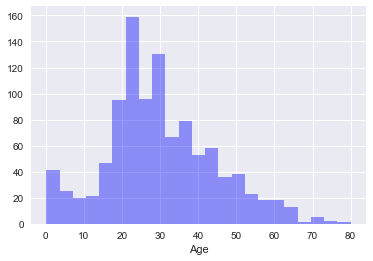

In [164]:
sns.distplot(a=data[~data['Age'].isnull()]['Age'], kde=False, color="b");

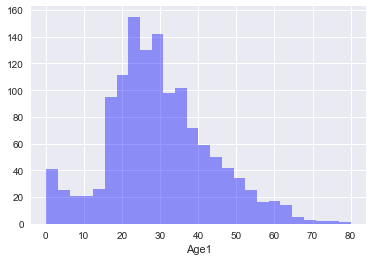

In [165]:
sns.distplot(a=data['Age1'], kde=False, color="b");

In [166]:
data['Age']=data['Age1']
data.drop('Age1', axis=1, inplace=True)


In [167]:
data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1309 entries, 0 to 417
Data columns (total 17 columns):
Age            1309 non-null float64
Cabin          295 non-null object
Embarked       1309 non-null object
Fare           1309 non-null float64
Name           1309 non-null object
Parch          1309 non-null int64
PassengerId    1309 non-null int64
Pclass         1309 non-null int64
Sex            1309 non-null object
SibSp          1309 non-null int64
Survived       891 non-null float64
Ticket         1309 non-null object
Surname        1309 non-null object
Title          1309 non-null object
FamilySize     1309 non-null int64
FSize          1287 non-null object
Deck           295 non-null object
dtypes: float64(3), int64(5), object(9)
memory usage: 224.1+ KB


## Feature Engineering: Round 2

Now that we know everyone’s age, we can create a couple of new age-dependent variables: Child and Mother. A child will simply be someone under 18 years of age and a mother is a passenger who is 1) female, 2) is over 18, 3) has more than 0 children (no kidding!), and 4) does not have the title ‘Miss’.

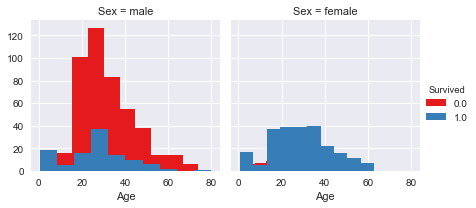

In [168]:
g = sns.FacetGrid(data, col='Sex',hue='Survived',palette='Set1')
g = (g.map(plt.hist, "Age")).add_legend()

In [169]:
# Create the column child, and indicate whether child or adult
def isChild(row):
    if row['Age']<18:
        return 'Child'
    elif row['Age']>=18:
        return 'Adult'
    
data['Child'] = data.apply(lambda r : isChild(r), axis=1)

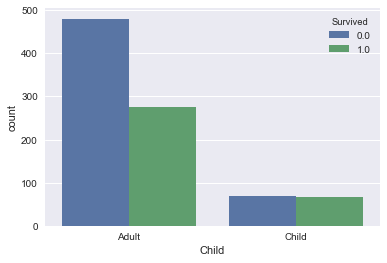

In [170]:
sns.countplot(x='Child', data=data, hue='Survived');

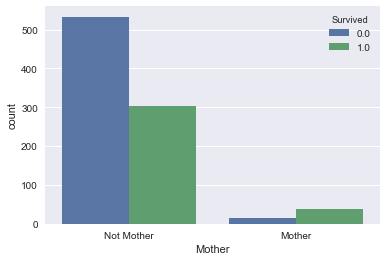

In [171]:
# Looks like being a child doesn’t hurt, but it’s not going to necessarily save you either! We will finish off our feature engineering by creating the Mother variable. Maybe we can hope that mothers are more likely to have survived on the Titanic.

# Adding mother variable

def isMother(row):
    if row['Sex']=='female' and row['Parch']>0 and row['Age']>18.0 and row['Title']!='Miss':
        return 'Mother'
    else:
        return 'Not Mother'


data['Mother']=data.apply(lambda r: isMother(r), axis=1) 
sns.countplot(x='Mother', data=data, hue='Survived')

In [172]:
data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1309 entries, 0 to 417
Data columns (total 19 columns):
Age            1309 non-null float64
Cabin          295 non-null object
Embarked       1309 non-null object
Fare           1309 non-null float64
Name           1309 non-null object
Parch          1309 non-null int64
PassengerId    1309 non-null int64
Pclass         1309 non-null int64
Sex            1309 non-null object
SibSp          1309 non-null int64
Survived       891 non-null float64
Ticket         1309 non-null object
Surname        1309 non-null object
Title          1309 non-null object
FamilySize     1309 non-null int64
FSize          1287 non-null object
Deck           295 non-null object
Child          1309 non-null object
Mother         1309 non-null object
dtypes: float64(3), int64(5), object(11)
memory usage: 244.5+ KB


## Prediction

## Split into training & test sets

In [ ]:
data.drop(['Cabin','Name','Ticket','Surname','Deck'],inplace=True, axis=1)

In [201]:
embarked = pd.get_dummies(data['Embarked'], drop_first = False)
sex = pd.get_dummies(data['Sex'],drop_first=True)
title = pd.get_dummies(data['Title'], drop_first = False)
fSize = pd.get_dummies(data['FSize'], drop_first = False)
child = pd.get_dummies(data['Child'], drop_first = True)
mother = pd.get_dummies(data['Mother'], drop_first = True)

m_data = pd.concat([data['PassengerId'],data['Age'],data['Fare'],data['Parch'],data['Pclass'],data['SibSp'],data['Survived'],embarked,sex,title,fSize,child,mother],axis=1)
d_train = m_data.iloc[:891]
d_test = m_data[891:].drop('Survived', axis=1)

In [202]:
# Building the model
d_test.info()


<class 'pandas.core.frame.DataFrame'>
Int64Index: 418 entries, 0 to 417
Data columns (total 20 columns):
PassengerId    418 non-null int64
Age            418 non-null float64
Fare           418 non-null float64
Parch          418 non-null int64
Pclass         418 non-null int64
SibSp          418 non-null int64
C              418 non-null uint8
Q              418 non-null uint8
S              418 non-null uint8
male           418 non-null uint8
Master         418 non-null uint8
Miss           418 non-null uint8
Mr             418 non-null uint8
Mrs            418 non-null uint8
Rare Title     418 non-null uint8
Large          418 non-null uint8
Singleton      418 non-null uint8
Small          418 non-null uint8
Child          418 non-null uint8
Not Mother     418 non-null uint8
dtypes: float64(2), int64(4), uint8(14)
memory usage: 28.6 KB


0.821573033708


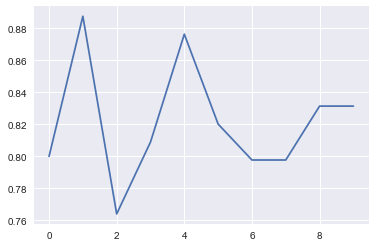

In [210]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import KFold
from sklearn.metrics import accuracy_score

train_x = d_train.drop(['Survived'],axis=1).values
train_y = d_train.Survived.values

cv_groups = KFold(n_splits=10)
regr = RandomForestClassifier(random_state = 0, n_estimators = 400)

outcomesRf=[]
    
for train_index, test_index in cv_groups.split(train_x):

    # Train the model using the training sets
    regr.fit(train_x[train_index], train_y[train_index])

    # Make predictions using the testing set
    pred_rf = regr.predict(train_x[test_index])

    # Calculate Accuracy for current cross-validation split
    accuracy = accuracy_score(train_y[test_index], pred_rf)
    outcomesRf.append(accuracy)

plt.plot(range(10),outcomesRf)
plt.ylabel=('accuracy')
print(np.mean(outcomesRf))

In [214]:
# Create submission file
final_prediction = regr.predict(d_test.values)

submission = pd.DataFrame(np.column_stack([d_test.PassengerId.astype('int32'), final_prediction.astype('int32')]), columns = ['PassengerId','Survived'])
submission.to_csv(path+"gender_submission.csv", index = False)